### CS 6840 Intro Machine Learning - Lab Assignment 1

# <center>End-to-End Machine Learning Pipeline: A Linear Regression Problem</center>

## <center><font color='red'>This is only for graduate students in CS 6840</font></center>

### 1. Overview
The learning objective of this lab assignment is for students to understand the end-to-end machine learning pipeline, including how to load the data from csv file to DataFrame, how to take a quick look at data structure and statistics, how to visualize the data to gain insights, how to deal with missing features and categorical features, and how to scale feature values. As we use diabetes data as an example, this lab assignment also includes how to build a linear regression model to predict the diabetes progression in one year, and how to evaluate the regression results.

#### Lecture notes. 
Detailed coverage of these topics can be found in the following:
<li>Terms and Principles of Machine Learning</li>
<li>Model Training using Gradient Descent</li>
<li>Feature Preprocessing</li>

#### Code demonstrations. 
<li>Code-2023-09-11-M-Model Training using Gradient Descent-1.ipynb</li>
<li>Code-2023-09-13-W-Model Training using Gradient Descent-2.ipynb</li>
<li>Code-2023-09-18-M-Feature Preprocessing.ipynb</li>

### 2. Submission
You need to submit a detailed lab report with code, running results, and answers to the questions. If you submit <font color='red'>a jupyter notebook (“Firstname-Lastname-6840-Lab1.ipynd”)</font>, please fill in this file directly and place the code, running results, and answers in order for each question. If you submit <font color='red'>a PDF report (“Firstname-Lastname-6840-Lab1.pdf”) with code file (“Firstname-Lastname-6840-Lab1.py”)</font>, please include the screenshots (code and running results) with answers for each question in the report.  

### 3. Questions (50 points)

For this lab assignment, you will be using the `Diabetes dataset` to complete the following tasks and answer the questions. Diabetes dataset has different features and a target label. You will use these features to build a linear regression model to predict the diabetes disease progression one year. First, please place `diabetes.csv` and your notebook/python file in the same directory, and load the data into DataFrame.   

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Please place diabetes.csv and your notebook/python file in the same directory; otherwise, change DATA_PATH 
DATA_PATH = ""

def load_diabetes_data(diabetes_path=DATA_PATH):
    csv_path = os.path.join(diabetes_path, "diabetes.csv")
    return pd.read_csv(csv_path)

diabetes = load_diabetes_data()

***
#### Question 1 (4 points):  
Please print out the information/statistics of diabetes DataFrame in function `answer_one( )`, and describe: how many records does the diabetes dataset have? Except for the target label `diabetes_progression_one_year`, how many features does the diabetes dataset have? What are these features? Among these features, which feature is non-numerical (categorical) and which feature has missing values? 

In [2]:
def answer_one():
    
    #Prints summary of dataframe
    print(diabetes.info())
    
    #Prints column with missing values and the sum of missing values
    missing_values = diabetes.isnull().sum()
    print("Columns with missing values:")
    for column, num_missing in missing_values.items():
        if num_missing > 0:
            print(f"{column}: {num_missing} missing values")
    

#Run your function in the cell to return the result
answer_one()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            442 non-null    int64  
 1   gender                         442 non-null    object 
 2   bmi                            442 non-null    float64
 3   blood_pressure                 442 non-null    float64
 4   total_serum_cholesterol        442 non-null    int64  
 5   low_density_lipoproteins       442 non-null    float64
 6   high_density_lipoproteins      442 non-null    float64
 7   total_cholesterol              431 non-null    float64
 8   serum_triglycerides_level      442 non-null    float64
 9   blood_sugar_level              442 non-null    int64  
 10  diabetes_progression_one_year  442 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 38.1+ KB
None
Columns with missing values:
total_cholesterol:

#### Answer 1:
There are 442 entries, which indicates that there are 442 records.<br>
There are 11 columns and thus 10 features (since we are excluding diabetes_progression_one_year as the target label).<br><br>
The features are: age, gender, bmi, blood pressure, total serum cholesterol, low density lipoproteins, high density lipoproteins, total cholesterol, serum triglycerides level, and blood sugar level.<br>
The feature for gender is non-numerical, but could easily be represented as a binary value since there are only two biological genders.<br><br>
The total cholesterol feature has 11 missing values and all other columns only have non-null values.

***
#### Question 2 (4 points):  
Please visualize the data by plotting a histogram for each numerical feature in function `answer_two( )`, and describe the scale and distribution characteristics of these features. In particular, please describe your observation on the data distribtuion for the feature `total_cholesterol`. 

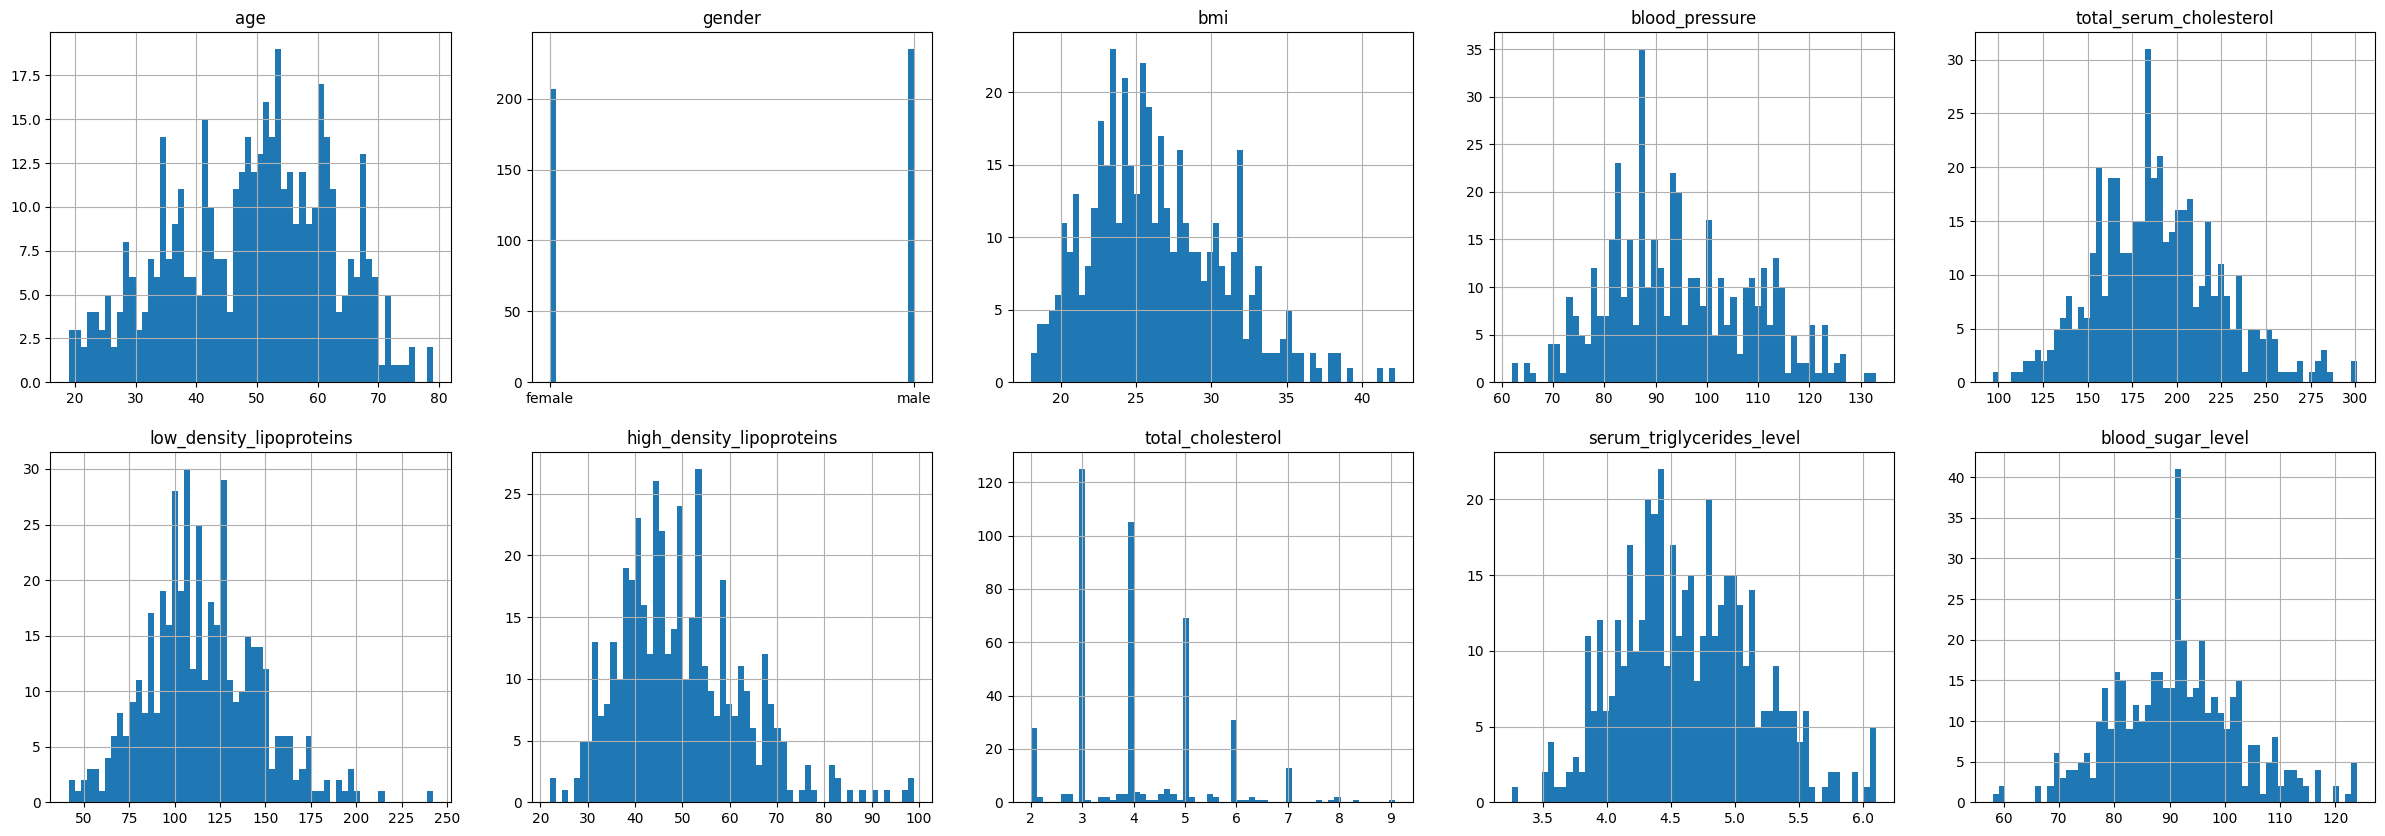

age: 19-79
bmi: 18.0-42.2
blood_pressure: 62.0-133.0
total_serum_cholesterol: 97-301
low_density_lipoproteins: 41.6-242.4
high_density_lipoproteins: 22.0-99.0
total_cholesterol: 2.0-9.09
serum_triglycerides_level: 3.2581-6.107
blood_sugar_level: 58-124
female: 207
male: 235


In [3]:
def answer_two():
    #Creates list of features, excluding diabetes_progression_one_year
    features_to_plot = [col for col in diabetes.columns if col != 'diabetes_progression_one_year']
    
    #Sets the number of subplots based on the number of features to plot
    num_features = len(features_to_plot)
    num_plots_per_row = 5
    num_rows = (num_features - 1) // num_plots_per_row + 1

    #Creates a grid of subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_plots_per_row, figsize=(30, 5 * num_rows))

    #Creates list to hold min/max data
    scale_data = []

    #Prints the feature data to the subplots
    for i, feature in enumerate(features_to_plot):
        if feature != 'gender':
            scale_data.append(feature)
            scale_data.append(": ")
            scale_data.append(str(diabetes[feature].min()))
            scale_data.append("-")
            scale_data.append(str(diabetes[feature].max()))
            scale_data.append("\n")
        
        row_idx = i // num_plots_per_row
        col_idx = i % num_plots_per_row
        diabetes[feature].hist(ax=axes[row_idx, col_idx], bins=60)
        axes[row_idx, col_idx].set_title(feature)

    #Create statistics for non-numerical gender column
    gender_counts = diabetes['gender'].value_counts()

    #Adds the counts for gender
    scale_data.append("female: ")
    if 'female' in gender_counts.index:
        scale_data.append(str(gender_counts['female']))

    scale_data.append("\n")
    scale_data.append("male: ")
    if 'male' in gender_counts.index:
        scale_data.append(str(gender_counts['male']))

    #Plots the histograms
    plt.show()

    #Prints the minimum and maximum values for numerical columns
    print("".join(scale_data))


#Run your function in the cell to return the result
answer_two()

#### Answer 2:
Statistical values for each numerical feature's min and max are computed in the table above.<br><br>
Here is a breakdown of the scale (min-max) for each numerical feature:<br>
`age` 19-79<br>
`bmi` 18-42.2<br>
`blood pressure` 62.0-133.0<br>
`total serum cholesterol` 97-301<br>
`low density lipoproteins` 41.6-242.4<br>
`high density lipoproteins` 22.0-99.0<br>
`total cholesterol` 2.0-9.09<br>
`serum triglycerides level` 3.2581-6.107<br>
`blood sugar level` 58-124<br><br>
The distribution pattern appears to be be a bell-shaped curve in the histogram for most of the features, which suggests a normal distribution. However this is not true for the `total cholesterol` feature. This distribution is unlike the others in that it is positively skewed (most of the values are on the left-side of the histogram) which means that most of the values are on the lower-end of the scale. It also shows a long right tail which indicates that the distribution of the `total cholesterol` decreases as the value increases (again indicating that most values are on the lower-end of the scale).

***
#### Question 3 (4 points):  
Please calculate feature correlation matrix and print out the feature correlation information for `diabetes_progression_one_year` in function `answer_three( )`, and describe: except for `diabetes_progression_one_year` itself, which feature has the strongest correlation with `diabetes_progression_one_year`, and which feature has the weakest correlation with `diabetes_progression_one_year`? Why?   

In [4]:
def answer_three():
    #Calculates the correlation matrix
    corr_matrix = diabetes.corr(numeric_only=True)

    values = []
    target_corr = corr_matrix['diabetes_progression_one_year'].sort_values(ascending=False)

    max_feature = ""
    min_feature = ""

    max_corr = 0
    min_corr = 1

    for feature, correlation in target_corr.items():
        values.append(feature)
        values.append(": ")
        values.append(str(correlation))
        values.append("\n")
        if correlation > max_corr and feature != 'diabetes_progression_one_year':
            max_feature = feature
            max_corr = correlation
        if correlation < min_corr and feature != 'diabetes_progression_one_year':
            min_feature = feature
            min_corr = correlation
    
    #Prints the feature correlation information for diabetes_progression_one_year from corr_matrix in the descending order
    print("".join(values))

    #Prints max and min correlation values
    print("Max correlation is with", max_feature, "with a correlation value of", max_corr)
    print("Min correlation is with", min_feature, "with a correlation value of", min_corr)


#Run your function in the cell to return the result
answer_three()

diabetes_progression_one_year: 1.0
bmi: 0.5864501344746884
serum_triglycerides_level: 0.5658825924427435
blood_pressure: 0.4414817585625712
total_cholesterol: 0.4259797566449215
blood_sugar_level: 0.3824834842485807
total_serum_cholesterol: 0.2120224810145505
age: 0.18788875071891994
low_density_lipoproteins: 0.17405358696874243
high_density_lipoproteins: -0.39478925067091813

Max correlation is with bmi with a correlation value of 0.5864501344746884
Min correlation is with high_density_lipoproteins with a correlation value of -0.39478925067091813


#### Answer 3:
The correlation for each feature with `diabetes_progression_one_year` is:<br>
`bmi`: 0.5864501344746884<br>
`serum_triglycerides_level`: 0.5658825924427435<br>
`blood_pressure`: 0.4414817585625712<br>
`total_cholesterol`: 0.4259797566449215<br>
`blood_sugar_level`: 0.3824834842485807<br>
`total_serum_cholesterol`: 0.2120224810145505<br>
`age`: 0.18788875071891994<br>
`low_density_lipoproteins`: 0.17405358696874243<br>
`high_density_lipoproteins`: -0.39478925067091813<br><br>
The strongest correlation is with `bmi` (body mass index) with a correlation value of 0.5658825924427435<br>
The weakest correlation is with `low_density_lipoproteins` (LDL cholesterol) with a correlation value of 0.17405358696874243<br><br>
While it shows that the `high_density_lipoproteins` has a negative value, since the absolute value of the correlation is larger than the `low_density_lipoproteins` value, it actually has a stronger correlation, albeit negative.

***
#### Question 4 (2 points):  
From question 3, you can figure out the feature (<font color='red'>strongest_feature</font>) that has the strongest correlation with `diabetes_progression_one_year`, and the feature (<font color='red'>weakest_feature</font>) that has the weakest correlation with `diabetes_progression_one_year`. Please fill in feature name in the option `x=" "` of plot function in `answer_four( )` to plot the data distribution between the strongest/weakest feature and `diabetes_progression_one_year`. Please describe your observations on these two plots: how the data distribution looks like for each plot, and if the data distribution conforms to the obtained feature correlation? 

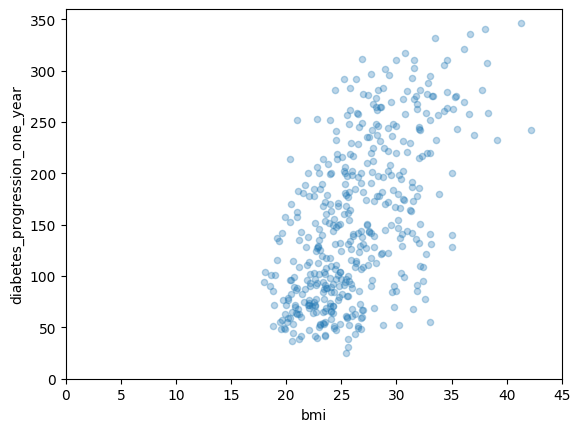

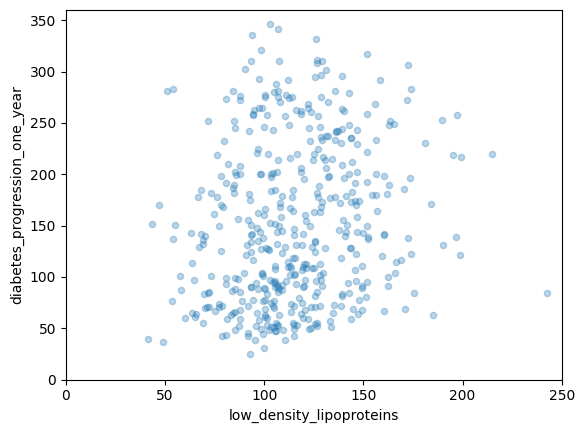

In [5]:
def answer_four():
    #Creates a scatter plot of bmi against diabetes_progression_one_year 
    diabetes.plot(kind="scatter", x="bmi", y="diabetes_progression_one_year", alpha=0.3)
    plt.axis([0, 45, 0, 360])
    
    #Creates a scatter plot of low_density_lipoproteins against diabetes_progression_one_year
    diabetes.plot(kind="scatter", x="low_density_lipoproteins", y="diabetes_progression_one_year", alpha=0.3)
    plt.axis([0, 250, 0, 360])
    
    plt.show()


#Run your function in the cell to return the result
answer_four()

#### Answer 4:
The scatter plots support the conclusion of the strongest and weakest correlations.<br><br>The first plot shows that there is an identifiable correlation where the `diabetes_progression_one_year` value increases as the value for `bmi` increases. A line of best fit applied to the first plot would have a slope that shows `diabetes_progression_one_year` increasing at a similar rate to `bmi`.<br><br>The second plot shows that there is an extremely weak correlation to what the `diabetes_progression_one_year` value is in regard to the `low_density_lipoproteins` value. This line of best fit would be rather difficult to visually estimate given the extremely wide distribution across the plot, thus supporting the weak correlation.

***
#### Divide the DataFrame into features `diabetes_features` and labels `diabetes_labels`

In [6]:
diabetes_labels = diabetes["diabetes_progression_one_year"].copy() # use diabete_progression_one_year as label
diabetes_features = diabetes.drop("diabetes_progression_one_year", axis=1) # drop diabete_progression_one_year

***
#### Question 5 (4 points):  
As `total_cholesterol` has missing values, please use its <font color=red>median</font> number to set those missing feature values in function `answer_five( )`. After processing, please describe if there are still data records with NULL feature values by using the given code line.   

In [7]:
def answer_five():
    #Sets the variable 'median' to the median value for the total_cholesterol feature
    median = diabetes_features['total_cholesterol'].median()

    #Replaces the null values within the total_cholesterol feature to the calculated median value
    diabetes_features["total_cholesterol"].fillna(median, inplace=True)


#Run your function in the cell to return the result
answer_five()

In [8]:
#Check if there are still records with null feature values
#Empty DataFrame means no record with null feature values
print(diabetes_features[diabetes_features.isnull().any(axis=1)].head())
if diabetes_features[diabetes_features.isnull().any(axis=1)].head().empty:
    print("All null values have been replaced with the median")
else:
    print("There are still null values in the DataFrame")

Empty DataFrame
Columns: [age, gender, bmi, blood_pressure, total_serum_cholesterol, low_density_lipoproteins, high_density_lipoproteins, total_cholesterol, serum_triglycerides_level, blood_sugar_level]
Index: []
All null values have been replaced with the median


#### Answer 5:
After running the code, there are no longer null values in the `total_cholesterol` feature column as indicated above. All null values were replaced with 4.0, which is the median value for the feature.

***
#### Divide features into numerical part `diabetes_num` and categorical part `diabetes_cat`

In [9]:
#diabetes_num only includes the numerical features without gender
diabetes_num = diabetes_features.drop("gender", axis=1)

#diabetes_cat only includes the categorical feature gender
diabetes_cat = diabetes_features[["gender"]]
print(diabetes_cat["gender"].value_counts())

gender
male      235
female    207
Name: count, dtype: int64


***
#### Question 6 (5 points):
As gender contains categories without order, please convert these categoties into numbers directly using `OrdinalEncoder` in function `answer_six( )`, and print out gender values after conversion.

In [10]:
from sklearn.preprocessing import OrdinalEncoder

def answer_six():
    #Creates variable to call Ordinal Encoder from
    ordinal_encoder = OrdinalEncoder()
    #Sets return value to transform gender feature data into numerical data
    diabetes_cat_encoded = ordinal_encoder.fit_transform(diabetes_cat)
    
    return diabetes_cat_encoded

#Run your function in the cell to return the result
diabetes_cat_encoded = answer_six()
print(diabetes_cat_encoded)

[[0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.

***
#### Question 7 (5 points):
As numerical features have very different scales, please get all the features to have the same scale using `StandardScaler` in function `answer_seven( )`, and print out feature values after scaling.

In [11]:
from sklearn.preprocessing import StandardScaler

def answer_seven():
    #Creates variable to call StandardScaler from
    std_scaler = StandardScaler()
    #Uses std_scaler to set the features to all have the same scale
    diabetes_num_scaled = std_scaler.fit_transform(diabetes_num)
    
    return diabetes_num_scaled

#Run your function in the cell to return the result
diabetes_num_scaled = answer_seven()
print(diabetes_num_scaled)

[[ 0.80050009  1.29708846  0.45984057 ... -0.05502621  0.41853093
  -0.37098854]
 [-0.03956713 -1.08218016 -0.55350458 ... -0.83833011 -1.43658851
  -1.93847913]
 [ 1.79330681  0.93453324 -0.1192138  ... -0.05502621  0.06015558
  -0.54515416]
 ...
 [ 0.87686984 -0.33441002  0.36357278 ... -0.23518611 -0.98564884
   0.32567395]
 [-0.9560041   0.82123474  0.02554979 ...  0.56378387  0.93616291
  -0.54515416]
 [-0.9560041  -1.53537419 -1.71161333 ... -0.83833011 -0.08875225
   0.06442552]]


***
#### Concatenate `diabetes_num_scaled` and `diabetes_cat_encoded` into the final features `X` 

In [12]:
#Diabetes features
X = np.concatenate((diabetes_num_scaled, diabetes_cat_encoded), axis=1)

#Diabetes labels
y = diabetes_labels.to_numpy()

print(X.shape)
print(y.shape)

(442, 10)
(442,)


***
#### Question 8 (4 points):
Please use `train_test_split` to split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)` in function `answer_eight()`, and describe the shape of `X_train`, `X_test`, `y_train`, and `y_test`, respectively. 

**Set `random_state=42` and `test_size=0.2` in `train_test_split` to make sure 80% of your dataset is used for training and 20% for testing**

In [13]:
from sklearn.model_selection import train_test_split

def answer_eight():
    #Splits the dataset into training and test sets for the features (X) and the target label (y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    
    
    return X_train, X_test, y_train, y_test


#Run your function in the cell to return the result
X_train, X_test, y_train, y_test = answer_eight()

(353, 10)
(353,)
(89, 10)
(89,)


#### Answer 8:
The `X_train` dataset has 10 features each for 353 out of the total 442 rows of data, which is 79.86% (roughly 80%) of the total data.<br>The `X_test` dataset also has 10 features each for 89 out of the total 442 rows of data, which is 20.14% (roughly 20%) of the total data.<br><br>The `y_train` dataset is the target label for training and has 353 out of the total 442 rows of data.<br>The `y_test` dataset is the target label for testing and has 89 out of the total 442 rows of data.<br>These also reflect the 80/20 split.<br><br>This should show that the train_test_split function was correctly implemented for this question.

***
#### Question 9 (4 points):
Please use `LinearRegression` to build a linear regression model with `X_train` and `y_train` in function `answer_nine( )`.

In [14]:
from sklearn.linear_model import LinearRegression

def answer_nine():
    #Creates variable to call LinearRegression from
    lin_reg = LinearRegression()
    
    #Trains the model using lin_reg
    lin_reg.fit(X_train, y_train)
    
    return lin_reg


#Run your function in the cell to return the result
lin_reg = answer_nine()

***
#### Question 10 (5 points):
Please evaluate the linear regression model by calculating root mean square error (RMSE) and mean absolute error (MAE) between the true labels `y_test` and predictions `y_predict` in function `answer_ten( )`, and describe the results of RMSE and MAE.

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_predict = lin_reg.predict(X_test)

def answer_ten():
    #Calculates mean square error and root mean square error
    mse = mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse)
    print("rmse =", rmse)
    
    #Calculates mean absolute error
    mae = mean_absolute_error(y_test, y_predict)
    print("mae =", mae)
    
    return rmse, mae


#Run your function in the cell to return the result
rmse, mae = answer_ten()

rmse = 53.63854782524957
mae = 42.70802875474396


#### Answer 10:
The `root mean square error` for the model is 53.63854782524957<br>The `mean absolute error` for the model is 42.70802875474396<br><br>Ideally, the values for the `RMSE` and `MAE` should be as low as possible. This means that the average difference between the actual and predicted values for the model is relatively low. Having this average (as error) representing a low value means that the model is doing a good job of making correct predictions, thus the training was effective.

***
#### Question 11 (2 points):
Please use the following given code to plot the true labels `y_test` (blue) and predictions `y_predict` (red), and according to RMSE, MAE, and the plot, describe if your linear regression model trained on `X_train` and `y_train` makes good predictions and explain why.

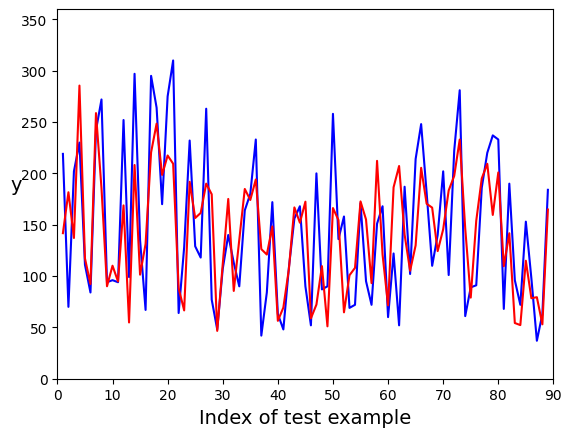

In [16]:
indices = np.arange(1, 90)
plt.plot(indices, y_test, "b-")
plt.plot(indices, y_predict, "r-")
plt.xlabel("Index of test example", fontsize=14)
plt.ylabel("y", fontsize=14, rotation=0)
plt.axis([0, 90, 0, 360])
plt.show()

#### Answer 11:
This plot provides a means to visually compare how well the linear regression model's predictions (red line) follow the actual values (blue line) over the test set. The red line generally follows the blue line in this example, with only minor inconsistencies. Weaker areas of the training are represented by opposing trends in the blue and red lines, but these are only transient and infrequent over the plot's distribution. I would say that the model is doing a decent job at predicting the correct value.

***
#### Question 12 (7 points):
Please use `train_test_split` to split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)` again, but this time **20% of your dataset is used for training and 80% for testing**. And then use `LinearRegression` to build a linear regression model with `X_train` and `y_train`. After that, evaluate the linear regression model by calculating root mean square error (RMSE) and mean absolute error (MAE) between the true labels `y_test` and predictions `y_predict` in function `answer_twelfve( )`. Please describe the new results of RMSE and MAE, the difference between these results and the ones obtained in Question 10 and explain why this happens. Also, based on the observations, draw your conclusion on the impact of training data on the model performance. 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def answer_twelfve():
    #Saves old rmse and mae:
    rmse_prev = 53.63854782524957
    mae_prev = 42.70802875474396
    
    #Splits the dataset into training and test sets for the features (X) and the target label (y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.8)
    
    #Creates variable to call LinearRegression from
    lin_reg = LinearRegression()
    
    #Trains the model using lin_reg
    lin_reg.fit(X_train, y_train)
    
    #Use the trained lin_reg to make prediction on X_test
    y_predict = lin_reg.predict(X_test)
    
    #Calculates mean square error and root mean square error
    mse = mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse)
    print("rmse:", rmse)
    
    #Calculates mean absolute error
    mae = mean_absolute_error(y_test, y_predict)
    print("mae:", mae)

    #Calculates change in value of rmse and mae after re-train
    rmse_difference = rmse - rmse_prev
    print("Difference in rmse:", rmse_difference)
    mae_difference = mae - mae_prev
    print("Difference in mae:", mae_difference)

    #Calculates change in model's performance
    rmse_change = rmse_difference  * (-1) / rmse_prev * 100
    rmse_percent = str(rmse_change) + "%"
    print("The model's increase in performance for rmse was:", rmse_percent)
    mae_change = mae_difference * (-1) / mae_prev * 100
    mae_percent = str(mae_change) + "%"
    print("The model's increase in performance for mae was:", mae_percent)
    
    return rmse, mae


#Run your function in the cell to return the result
rmse, mae = answer_twelfve()

rmse: 58.39309474154971
mae: 47.32001105235483
Difference in rmse: 4.754546916300143
Difference in mae: 4.611982297610872
The model's increase in performance for rmse was: -8.864048541713146%
The model's increase in performance for mae was: -10.79886483194001%


#### Answer 12:
The `root mean square error` for the new model is 58.39309474154971<br>The `mean absolute error` for the new model is 47.32001105235483<br><br>As stated in answer 10, the values for the `RMSE` and `MAE` should be as low as possible. This shows that the `RMSE` increased by 4.754546916300143 and that the `MAE` increased by 4.611982297610872 after re-training the model with a much smaller training set.<br><br>This can be interpreted as a decrease in performance, and is reflected in the `RMSE` increasing by about 8.9% and the `MAE` increasing by about 10.8%. Since lower values in these metrics indicate higher performance, it is clear that re-training the model using a smaller training set negatively impacted the model's ability to predict the target label.